In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('OCN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-751.2211518988703

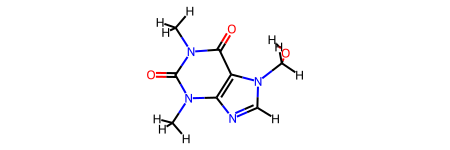

In [6]:
pk.mol

In [7]:
#calculate charges
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.59060147  0.2072682  -0.03257685  0.13971156 -0.49304459  0.18633863
 -0.07515936  0.31715887 -0.4673452  -0.06440477  0.44999764 -0.54470525
 -0.03409768 -0.02042929 -0.12135896  0.40788973  0.06413302  0.06413302
  0.16171289  0.06197346  0.06197346  0.06197346  0.08648648  0.08648648
  0.08648648]
[-0.63464122  0.31666737 -0.71522983  0.39602675 -0.62405304  0.64466415
  0.09034469  0.92420939 -0.67204979 -0.8768543   1.09686938 -0.62129908
 -0.87787905 -0.12213757 -0.12512763  0.38297684  0.13686464  0.14385692
  0.189025    0.15170741  0.15118878  0.1697347   0.15030911  0.14881455
  0.17601186]
[-0.34665985  0.12713441 -0.07256918  0.0895039  -0.27404892  0.14653616
 -0.12748233  0.30018505 -0.41591718 -0.18140326  0.34875794 -0.39257393
 -0.14911253 -0.12985363 -0.13618409  0.2221004   0.09970267  0.09072481
  0.12448797  0.10880224  0.10917538  0.11970247  0.1078638   0.1089109
  0.12221681]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,O,-0.591,-0.635,-0.347
1,C,0.207,0.317,0.127
2,N,-0.033,-0.715,-0.073
3,C,0.140,0.396,0.090
4,N,-0.493,-0.624,-0.274
5,C,0.186,0.645,0.147
6,C,-0.075,0.090,-0.127
7,C,0.317,0.924,0.300
8,O,-0.467,-0.672,-0.416
9,N,-0.064,-0.877,-0.181


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

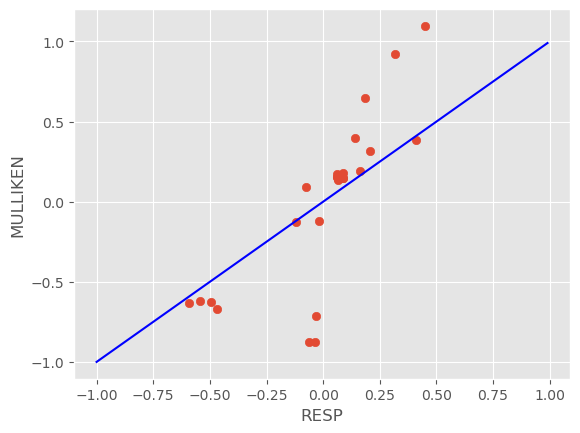

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

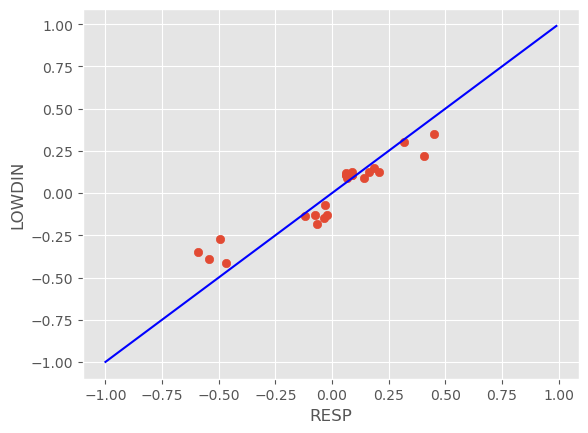

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

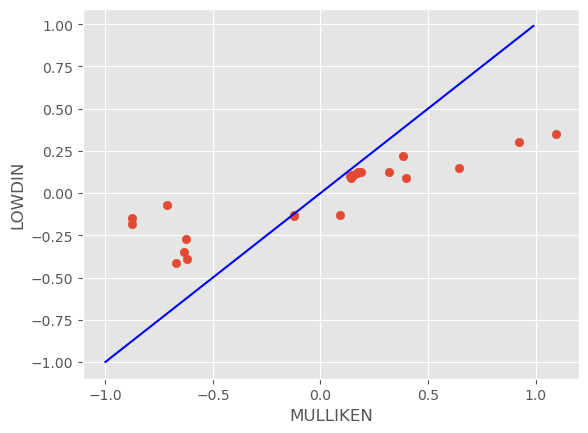

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')